1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues of the COV matrix: 
 [ 2.32443026e+01  1.00863533e+00 -9.39953908e-16]
Eigenvectors of the COV matrix: 
  [[-0.0967694  -0.81074185 -0.57735027]
 [-0.65373834  0.48917569 -0.57735027]
 [-0.75050774 -0.32156616  0.57735027]]
SVD : 
 [[ 0.8806454   1.07045809  1.95110349]
 [ 1.07045809 10.17536547 11.24582357]
 [ 1.95110349 11.24582357 13.19692706]] 
 Spectrum : 
 [2.32443026e+01 1.00863533e+00 9.16868462e-16]
The principal component 23.24 represent the 0.96 of the total dataset variability 

Number of dimensions for a 99% variability:  2 

The new covariance matrix:
 [[ 2.32443026e+01  6.39239523e-16 -1.45560172e-15]
 [ 6.39239523e-16  1.00863533e+00 -5.42058857e-16]
 [-1.45560172e-15 -5.42058857e-16  4.11381111e-31]]
Eigenvalues of the COV_pca matrix: 
 [2.32443026e+01 1.11022302e-16 1.00863533e+00]
Eigenvectors of the COV_pca matrix: 
 [[ 1.00000000e+00 -6.26218712e-17  2.87483850e-17]
 [ 0.00000000e+00 -5.76542865e-16 -1.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  5.

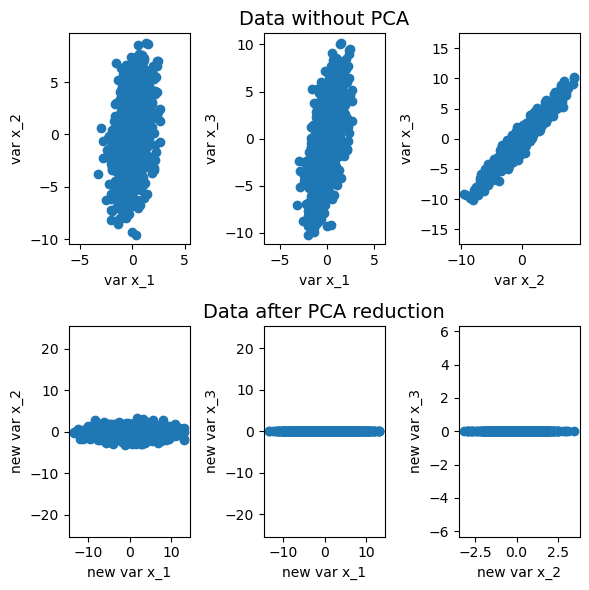

In [2]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import scipy as sp
from scipy import linalg as la
import matplotlib.pyplot as plt
np.random.seed(10)

x_1=np.random.normal(0,1,1000)
x_2=x_1 + np.random.normal(0,3,1000)
x_3=x_1+x_2
Data=[x_1,x_2,x_3]
Data=np.array(Data)
df=pd.DataFrame({'1': x_1, '2' : x_2, '3': x_3})
COV=np.cov([x_1,x_2,x_3])
#help(la.eig)
l,V=la.eig(COV)
print('Eigenvalues of the COV matrix: \n', np.real_if_close(l))
print('Eigenvectors of the COV matrix: \n ',V)

U,spectrum, Vt=la.svd(COV)
#help(la.svd)
m=COV.shape
D = np.zeros(m) # create matrix D
for i in range(m[1]):
    D[i, i] = spectrum[i]

SVD=np.dot(U,np.dot(D,Vt))
print('SVD : \n',SVD,'\n Spectrum : \n',spectrum)
np.allclose(SVD,COV)
pc_var=spectrum.max()/spectrum.sum()
print('The principal component %.2f represent the %.2f of the total dataset variability \n'%(spectrum.max(),pc_var))
# it makes sense since x_2 and x_3 are correlated with x_1
# lets try deleting dimensions so that 99% of the variabilty is retained
#I admit, this is elite, my original plan was to modify the original data and delete( make equal to zero) the entries of the dim. excluded
# but actually PCA only tell you how many ( and what ) dimensions have to be not considered
idx=np.argsort(spectrum)[::-1]
spectrum=spectrum[idx]
V=V[:,idx]
pc_var = spectrum / spectrum.sum()
cumulative = np.cumsum(pc_var)
k = np.searchsorted(cumulative, 0.99) + 1
print('Number of dimensions for a 99% variability: ',k,'\n')
PCA=spectrum[0]
 #newV=V[:,:k] if I want a 2 dimension problem 
Xpca=np.dot(V.T,Data)
COV_pca=np.cov(Xpca)
lpca,Vpca=la.eig(COV_pca)
print('The new covariance matrix:\n',COV_pca)

print('Eigenvalues of the COV_pca matrix: \n', np.real_if_close(lpca))
print('Eigenvectors of the COV_pca matrix: \n', Vpca)

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=[6,6])
for i,ax in enumerate(axes.flat):
    match i:
        case 0 :
            ax.scatter(Data[0,:], Data[1,:])
            ax.set_xlabel('var x_1')
            ax.set_ylabel('var x_2')
        case 1 :
            ax.scatter(Data[0,:], Data[2,:])
            ax.set_xlabel('var x_1')
            ax.set_ylabel('var x_3')
        case 2 :
            ax.scatter(Data[1,:], Data[2,:])
            ax.set_xlabel('var x_2')
            ax.set_ylabel('var x_3')
        case 3 :
            ax.scatter(Xpca[0,:], Xpca[1,:])
            ax.set_xlabel('new var x_1')
            ax.set_ylabel('new var x_2')
        case 4 :
            ax.scatter(Xpca[0,:], Xpca[2,:])
            ax.set_xlabel('new var x_1')
            ax.set_ylabel('new var x_3')
        case 5 :
            ax.scatter(Xpca[1,:], Xpca[2,:])
            ax.set_xlabel('new var x_2')
            ax.set_ylabel('new var x_3')
            
axes[0, 1].set_title("Data without PCA", fontsize=14)
axes[1, 1].set_title("Data after PCA reduction", fontsize=14)
for ax in axes.flat:
    ax.set_aspect('equal', adjustable='datalim')
    ax.autoscale()
fig.tight_layout()
# this plot can be better but idgaf

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Eigenvalues of the COV matrix: 
 [ 2.32443075e+01  1.00864022e+00 -2.33817001e-16  4.87745045e-04
  4.47398802e-04  3.32590632e-04  3.47239755e-04  4.19913444e-04
  3.68239239e-04  4.06705623e-04  3.80575997e-04  3.94898211e-04
  3.90946163e-04]
Number of dimensions for a 99% variability:  2 



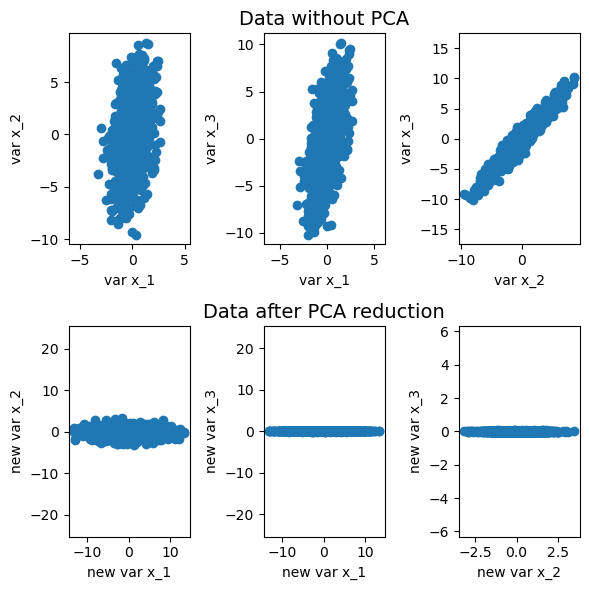

In [3]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import scipy as sp
from scipy import linalg as la
import matplotlib.pyplot as plt
np.random.seed(10)
x_1=np.random.normal(0,1,1000)
x_2=x_1 + np.random.normal(0,3,1000)
x_3=x_1+x_2
noise=np.zeros((10,1000))
for i in range(len(noise)):
    x=np.random.normal(0,1/50,1000)
    noise[i,:]=x
    
Data = np.vstack([x_1, x_2, x_3, noise])
df = pd.DataFrame({'x1': x_1,'x2': x_2,'x3': x_3})
noise_df = pd.DataFrame( noise.T, columns=[f'noise_{i+1}' for i in range(10)])
df = pd.concat([df, noise_df], axis=1)
COV=np.cov(Data)


l,V=la.eig(COV)
print('Eigenvalues of the COV matrix: \n', np.real_if_close(l))

idx=np.argsort(l)[::-1]
spectrum=l[idx]
V=V[:,idx]
pc_var = spectrum / spectrum.sum()
cumulative = np.cumsum(pc_var)
k = np.searchsorted(cumulative, 0.99) + 1
print('Number of dimensions for a 99% variability: ',k,'\n')
PCA=spectrum[0]
 #newV=V[:,:k] if I want a 2 dimension problem 
Xpca=np.dot(V.T,Data)
COV_pca=np.cov(Xpca)
lpca,Vpca=la.eig(COV_pca)
#print('The new covariance matrix:\n',COV_pca)

#print('Eigenvalues of the COV_pca matrix: \n', np.real_if_close(lpca))
#print('Eigenvectors of the COV_pca matrix: \n', Vpca)

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=[6,6])
for i,ax in enumerate(axes.flat):
    match i:
        case 0 :
            ax.scatter(Data[0,:], Data[1,:])
            ax.set_xlabel('var x_1')
            ax.set_ylabel('var x_2')
        case 1 :
            ax.scatter(Data[0,:], Data[2,:])
            ax.set_xlabel('var x_1')
            ax.set_ylabel('var x_3')
        case 2 :
            ax.scatter(Data[1,:], Data[2,:])
            ax.set_xlabel('var x_2')
            ax.set_ylabel('var x_3')
        case 3 :
            ax.scatter(Xpca[0,:], Xpca[1,:])
            ax.set_xlabel('new var x_1')
            ax.set_ylabel('new var x_2')
        case 4 :
            ax.scatter(Xpca[0,:], Xpca[2,:])
            ax.set_xlabel('new var x_1')
            ax.set_ylabel('new var x_3')
        case 5 :
            ax.scatter(Xpca[1,:], Xpca[2,:])
            ax.set_xlabel('new var x_2')
            ax.set_ylabel('new var x_3')
            
axes[0, 1].set_title("Data without PCA", fontsize=14)
axes[1, 1].set_title("Data after PCA reduction", fontsize=14)
for ax in axes.flat:
    ax.set_aspect('equal', adjustable='datalim')
    ax.autoscale()
fig.tight_layout()
# This process filter the noise in the background and the result is basically the same of the first eg.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [4]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import scipy as sp
from scipy import linalg as la
import matplotlib.pyplot as plt
np.random.seed(10)

n=3 # number of cameras
# if the motion is along x-y theta is fixed at pi/2
N=1000 # number of records per camera
k=1 # elastic costant of the string
m=1 # mass
omega=np.sqrt(k/m)
A=5 #amplitude of the oscillation
tau=50 # time costant
x=np.zeros((1000,n))
for i in range(1000):
    x[i]=A*np.cos((2*np.pi*omega*i)/tau)

 # data with noise along y
y=np.zeros((n,1000))
for i in range(n):
    y[i]=np.random.normal(0,1/50,1000) # noise


dof_label=[]
for i in range(n):
    dof_label.append(f'phi_{i+1}')
for i in range(n):
    dof_label.append(f'theta_{i+1}')

# put data in spherical coordinates
phi=np.arctan2(y.T,x) 
theta=np.ones((1000,n))*np.pi/2
data=np.hstack([phi,theta])


# now perfom PCA
COV=np.cov(data, rowvar=False)
l,V=la.eig(COV)
print('Eigenvalues of the COV matrix: \n', np.real_if_close(l))
idx=np.argsort(l)[::-1]
spectrum=l[idx]
V=V[:,idx]
dof_label=[dof_label[i] for i in idx]
pca_var=spectrum/spectrum.sum()
cumulative=np.cumsum(pca_var)
k=np.searchsorted(cumulative, 0.99)+1
print('Number of dimensions for a 99% variability: ',k,'\n')
Datapca=np.dot(data,V)
COV=np.cov(Datapca)
lpca,Vpca=la.eig(COV)
PCA_dof=[dof_label[i] for i in range(k)]

for label, coeff in zip(dof_label, V[:,0]):
    print(label, coeff)

print('Most important dimensions: \n', PCA_dof)
print('with eigenvector :\n', Vpca[::,:k])     
# remind that these are phi-theta eigenvector if I wanna obtain X, I have to retransform the data in x-y directions

Eigenvalues of the COV matrix: 
 [4.30464730e+00 4.98972816e+00 5.41620217e+00 1.16078632e-28
 3.45446742e-77 4.99197305e-61]
Number of dimensions for a 99% variability:  3 

phi_3 0.5460665774994129
phi_2 0.7351470076606207
phi_1 -0.4017090614682634
theta_1 -4.6436702340077066e-30
theta_3 -4.6436702340077066e-30
theta_2 -4.6436702340077066e-30
Most important dimensions: 
 ['phi_3', 'phi_2', 'phi_1']
with eigenvector :
 [[-0.02820626+0.j  0.00539907+0.j -0.00232294+0.j]
 [-0.02826143+0.j  0.00534995+0.j -0.00225219+0.j]
 [-0.02826996+0.j  0.00524681+0.j -0.00234447+0.j]
 ...
 [-0.02824031+0.j  0.00539341+0.j -0.00225074+0.j]
 [-0.02827018+0.j  0.00533606+0.j -0.00232655+0.j]
 [-0.02826124+0.j  0.00542352+0.j -0.0023322 +0.j]]


Eigenvalues:
[5.34799445 4.87122967 4.46959483 0.         0.         0.        ] 

Explained variance ratio:
[0.36408608 0.33162841 0.30428551 0.         0.         0.        ] 

Cumulative variance:
[0.36408608 0.69571449 1.         1.         1.         1.        ] 

Number of components for 99% variance: 3 

Dominant physical mode (PCA eigenvector):

phi_1    : +0.6983
phi_2    : -0.6988
phi_3    : -0.1549
theta_1  : +0.0000
theta_2  : +0.0000
theta_3  : +0.0000


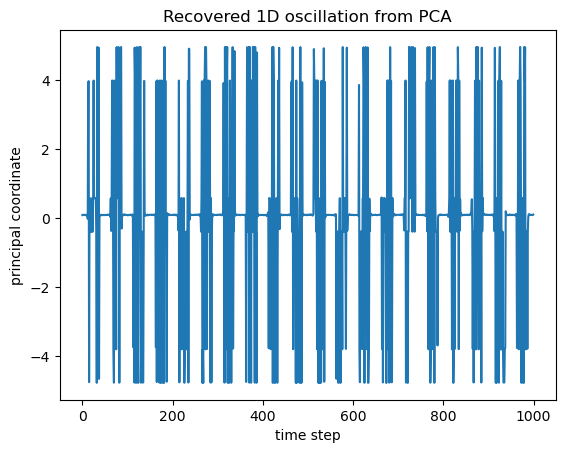

In [5]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

np.random.seed(100)

# -----------------------------
# Simulation parameters
# -----------------------------
n = 3          # number of cameras
N = 1000       # number of time samples
k = 1
m = 1
omega = np.sqrt(k/m)
A = 5
tau = 50

# -----------------------------
# True motion along x
# -----------------------------
x = np.zeros((N, n))
for i in range(N):
    x[i] = A * np.cos((2*np.pi*omega*i)/tau)

# small noise along y
y = np.zeros((n, N))
for i in range(n):
    y[i] = np.random.normal(0, 1/50, N)

# -----------------------------
# DOF labels
# -----------------------------
dof_label = []
for i in range(n):
    dof_label.append(f'phi_{i+1}')
for i in range(n):
    dof_label.append(f'theta_{i+1}')

# -----------------------------
# Convert to spherical angles
# -----------------------------
phi = np.arctan2(y.T, x)                 # shape (1000,3)
theta = np.ones((N, n)) * np.pi/2        # fixed theta

# final data matrix: (samples × DOFs)
data = np.hstack([phi, theta])           # shape (1000,6)

# -----------------------------
# PCA
# -----------------------------

X=data-np.mean(data, axis=0)
# covariance matrix of features
COV = np.cov(X, rowvar=False)

# eigen-decomposition (symmetric matrix → eigh)
eigvals, eigvecs = la.eigh(COV)

# sort descending by eigenvalue
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# explained variance
explained = eigvals / eigvals.sum()
cumulative = np.cumsum(explained)

# number of components for 99% variance
k = np.searchsorted(cumulative, 0.99) + 1

print("Eigenvalues:")
print(eigvals, "\n")

print("Explained variance ratio:")
print(explained, "\n")

print("Cumulative variance:")
print(cumulative, "\n")

print("Number of components for 99% variance:", k, "\n")

# -----------------------------
# Interpret dominant mode
# -----------------------------
print("Dominant physical mode (PCA eigenvector):\n")

for label, coeff in zip(dof_label, eigvecs[:, 0]):
    print(f"{label:8s} : {coeff:+.4f}")

# -----------------------------
# Optional: Project data onto first PCA coordinate
# -----------------------------
principal_coordinate = X @ eigvecs[:, 0]

plt.plot(principal_coordinate)
plt.title("Recovered 1D oscillation from PCA")
plt.xlabel("time step")
plt.ylabel("principal coordinate")
plt.show()


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2026-01-10 12:32:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/turino/data/magic04.data.2’

magic04.data.2          [     <=>            ]   1.41M   236KB/s    in 6.8s    

2026-01-10 12:32:16 (213 KB/s) - ‘/home/turino/data/magic04.data.2’ saved [1477391]

--2026-01-10 12:32:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/turino/data/magic04.names.2’

magic04.names.2         [ <=>                ]   5.27K  --.-KB/s    in 0s      


Eigenvalues : 
  [3.85322859e-04 1.07363851e-02 8.63965822e-02 1.17330074e+02
 4.33599171e+02 6.10187259e+02 1.32675968e+03 2.01638313e+03
 3.85387048e+03 6.57979140e+03]
The dimensions needed are : 
 7
The data frame now rotate in the PCA coordinates 

          fLength      fWidth       fSize       fConc      fConc1      fAsym  \
0      -66.770898   55.598192  -13.782929   23.910855  -48.094253   9.214111   
1     -174.588255  109.891592  -33.987128   -7.499934  -27.852709  11.070329   
2     -243.440502  111.280406 -162.323113  158.011234  -84.034269  48.769028   
3      -97.933588    58.00367  -42.243997    4.311444  -20.074677   8.227096   
4     -331.900019  145.558113  -40.844236    -7.84025  -39.158539 -20.131992   
...           ...         ...         ...         ...         ...        ...   
19015  -92.565079   56.976797  -19.077462    2.310343  -13.245568  -2.295051   
19016 -201.476793   119.75012  -61.301766  -11.541361  -110.71089   5.524871   
19017 -247.779335  105.154

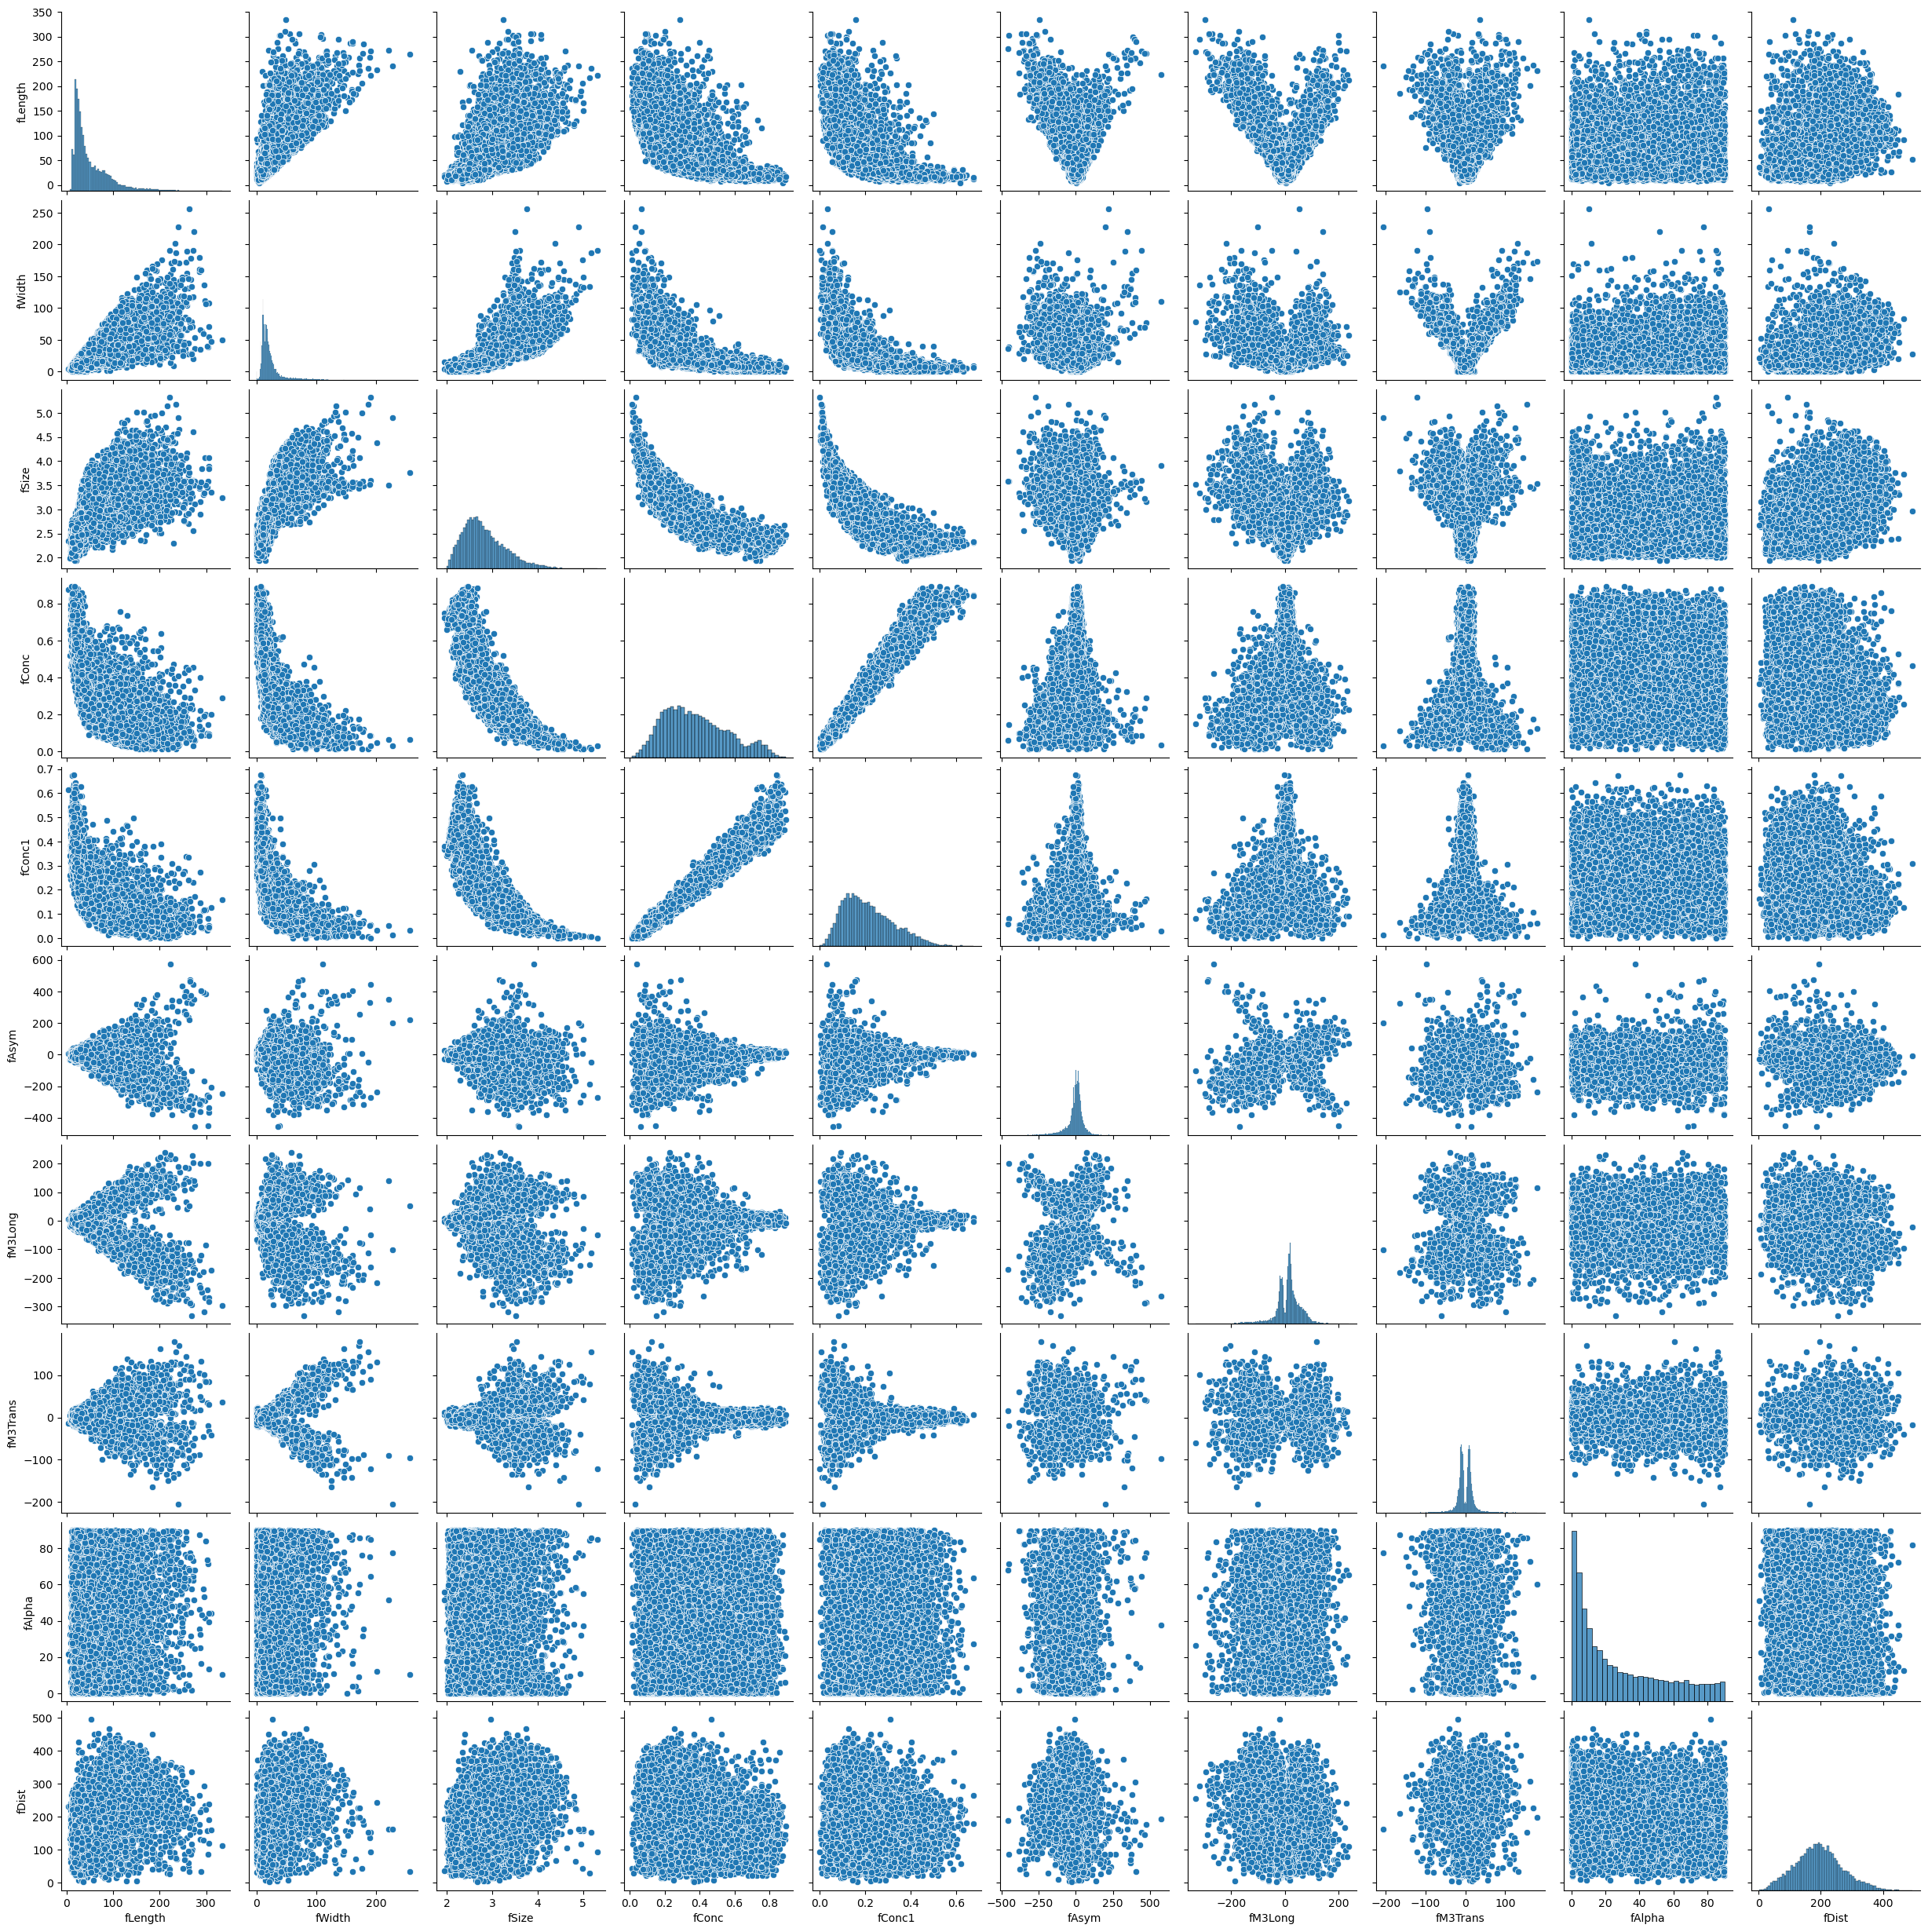

In [28]:
import seaborn as sns
file_name='/home/turino/data/magic04.data'
file_name_1='/home/turino/data/magic04.names'
df_names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv(file_name,header=None,names=df_names)
data=df.iloc[:,:-1]
# set g=1 and h=0 ?
data=data.to_numpy()

COV=np.cov(data,rowvar=False)
l,V=la.eigh(COV)
print('Eigenvalues : \n ',l)

indx=np.argsort(l)[::-1]
l=l[indx]
V=V[:,indx]
norm_l=l/l.sum()
cumulative=np.cumsum(norm_l)
k=np.searchsorted(cumulative, 0.999) +1
print('The dimensions needed are : \n' , k)

pca_data=np.dot(data,V)
df_pca=pd.DataFrame(np.column_stack((pca_data,df.iloc[:,-1].to_numpy())),columns=df_names)
print('The data frame now rotate in the PCA coordinates \n')
print(df_pca)
sns.pairplot(df)

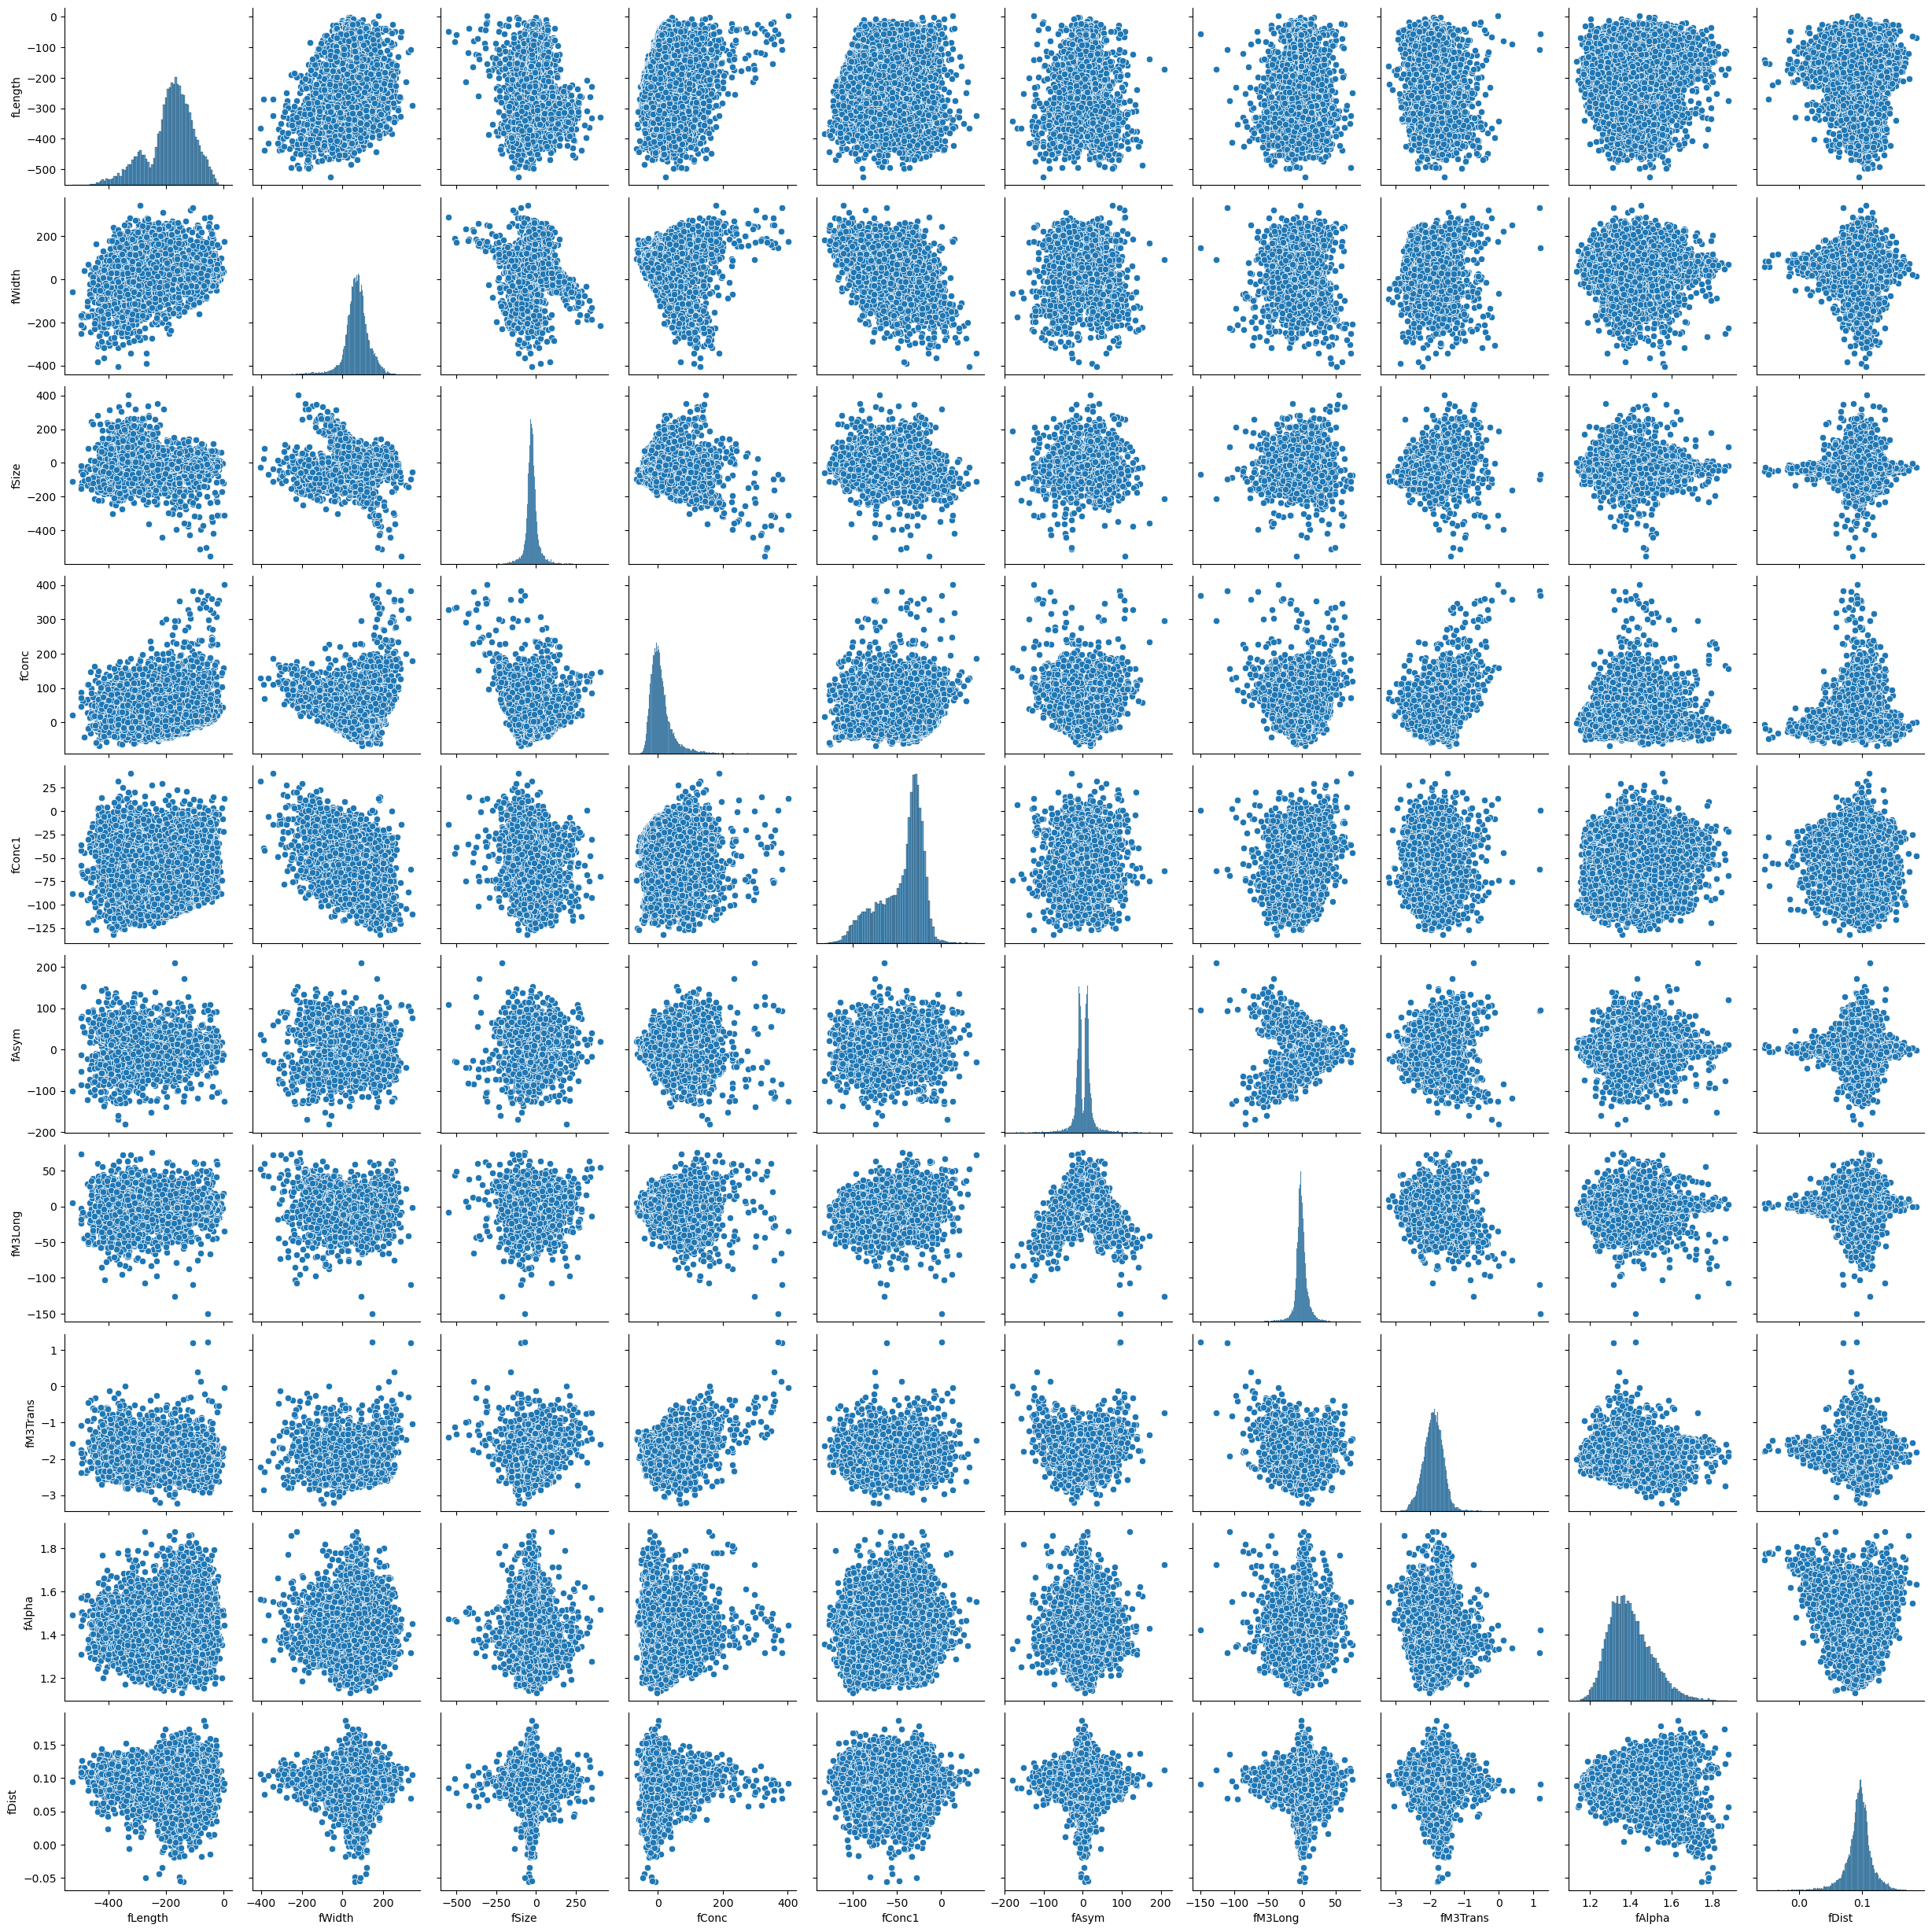

In [29]:
sns.pairplot(df_pca)